In [2]:
import pandas as pd

def remove_dollar (value:str)->float:
    return float(value[1:])

df= pd.read_csv ('data/fb.csv',
                parse_dates=['Date'],
                index_col = 'Date',
                engine = 'python'
            ).rename(columns={'Close/Last': 'Close_Last'}
            ).assign(
        Close_Last = lambda x: x['Close_Last'].map(remove_dollar),
       Open = lambda x: x['Open'].map(remove_dollar),
        High = lambda x: x['High'].map(remove_dollar),
        Low = lambda x: x['Low'].map(remove_dollar)
            ).sort_values(
                            by=['Date'], axis=0, ascending=True
            ).assign (
        Open_Avarage = lambda x: x['Open'].rolling(14).mean()
          )

df.index = df.index.strftime('%Y/%m/%d')
df

,Close_Last,Volume,Open,High,Low,Open_Avarage
Date,,,,,,
2012/05/18,38.2318,579377500,42.000,45.00,38.00,NaN
2012/05/21,34.0300,167943600,36.530,36.66,33.00,NaN
2012/05/22,31.0000,101667700,32.610,33.59,30.94,NaN
2012/05/23,32.0000,73541150,31.370,32.50,31.36,NaN
2012/05/24,33.0300,50208760,32.950,33.21,31.77,NaN
...,...,...,...,...,...,...
2021/09/23,345.9600,21806260,345.355,349.67,343.00,370.032214
2021/09/24,352.9600,18801930,343.239,354.35,342.37,367.781429
2021/09/27,353.5800,15205840,349.805,355.15,347.08,365.918929


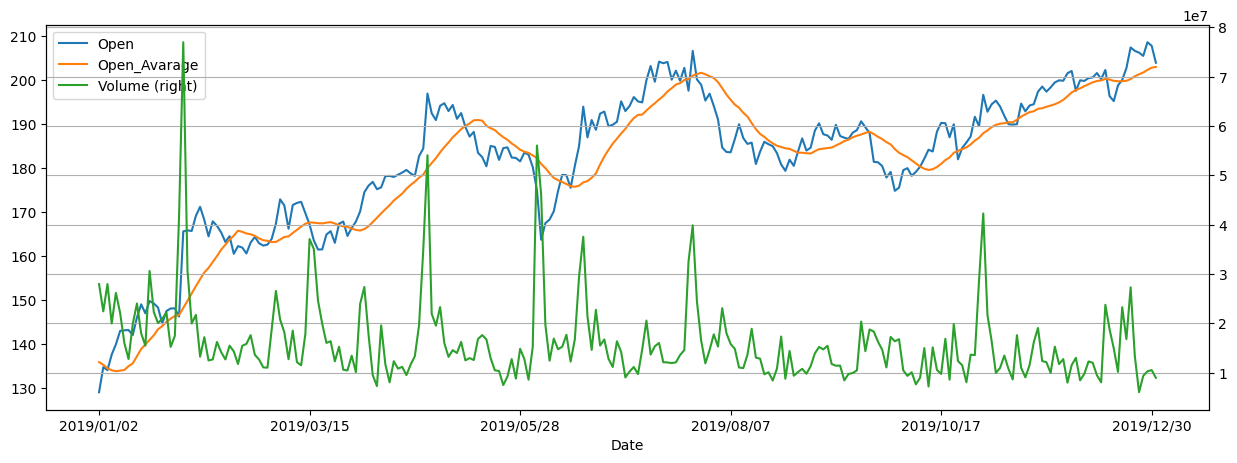

In [3]:
df ['2019':'2020 1'].plot (
    y=['Open', 'Open_Avarage', 'Volume'],
    figsize=(15, 5),
    secondary_y=('Volume'),
    grid=True    
);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2357 entries, 2012/05/18 to 2021/09/29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close_Last    2357 non-null   float64
 1   Volume        2357 non-null   int64  
 2   Open          2357 non-null   float64
 3   High          2357 non-null   float64
 4   Low           2357 non-null   float64
 5   Open_Avarage  2344 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 193.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close_Last,2357.0,1.394857e+02,8.439742e+01,1.772900e+01,7.483000e+01,1.310400e+02,1.853100e+02,3.821800e+02
Volume,2357.0,3.080838e+07,2.766896e+07,5.913066e+06,1.557761e+07,2.213150e+07,3.569320e+07,5.793775e+08
Open,2357.0,1.394342e+02,8.432121e+01,1.808000e+01,7.493000e+01,1.309200e+02,1.848500e+02,3.816800e+02
High,2357.0,1.410608e+02,8.529324e+01,1.827000e+01,7.555000e+01,1.321300e+02,1.868017e+02,3.843300e+02
Low,2357.0,1.377886e+02,8.339783e+01,1.755000e+01,7.401000e+01,1.297000e+02,1.832228e+02,3.788100e+02
Open_Avarage,2344.0,1.391376e+02,8.348989e+01,1.902929e+01,7.546661e+01,1.303882e+02,1.845055e+02,3.774047e+02
